# Aprendizaje supervisado - entrenamiento de modelos de machine learning

## Importación de librerías

In [268]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import warnings

from scipy.stats import norm

warnings.filterwarnings('ignore')

## Importación de datos

In [155]:
data = pd.read_csv("data_encoded.csv")

In [156]:
data.head()

,age,gender,education_level,marital_status,credit_score,loan_status,new_occupation,new_income
0,32,1,1,0,720,1,4,4
1,45,0,4,1,680,1,3,3
2,28,1,3,1,590,0,3,1
3,51,0,1,0,780,1,0,0
4,36,1,1,0,710,1,0,3


## Entrenamiento: Tareas previas 

Un modelo, no es mas que una función **f(x) = y** representando **x** a las variables independientes (features) que explican como calcular la variable objetivo a predecir **y**

### División entre Train y Test 

Un modelo aprende de un conjunto de datos de entrenamiento, sobre los patrones determinantes para diferenciar una clase de la otra. Luego, en la etapa de la predicción si se presentan esos mismos patrones, se otorga el mismo target que se observó en la etapa anterior. 

Generalmente se utiliza un 20% de los datos para evaluar el modelo.

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
x=data.drop(['loan_status'],axis=1)
y=data['loan_status']

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0, shuffle=True)

In [164]:
x_train.shape

(48, 7)

In [165]:
x_test.shape

(13, 7)

### Escalado de los datos

Cuando tenemos variables que se mueven en diferentes escalas, algunos modelos necesitan escalar los datos previamente, para evitar que el modelo erróneamente aprenda que una variable determinada (la de mayor escala) tiene más importancia en la explicación de la variable a predecir, con respecto a las otras.

Existen diferentes formas de escalar los datos:

- Standard Scaler: z = (x - u) / s , siendo u la media de los datos utilizados para entrenar, y s la desviación estandar.
- MinMaxScaler: X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)), siendo X.min el valor mínimo para esa característica y X.max el máximo.
- MaxAbsScaler: Xscaled= X/max(x), siendo x cada característica. 

In [168]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

In [169]:
scaler = StandardScaler()

In [170]:
x_train = scaler.fit_transform(x_train)
x_train[:10]

array([[-0.87549217, -0.8819171 ,  1.44069218,  1.29099445, -0.63364597,
        -0.54301184, -0.09381827],
       [ 1.18925237, -0.8819171 , -0.04647394, -0.77459667,  1.31961133,
         0.3769141 , -1.38046886],
       [-1.11840329, -0.8819171 , -1.53364006,  1.29099445, -0.77316435,
         0.3769141 , -0.09381827],
       [-1.23985886, -0.8819171 , -0.790057  ,  1.29099445, -1.61027462,
        -0.84965381, -0.73714357],
       [-0.99694773, -0.8819171 , -0.790057  ,  1.29099445, -1.33123786,
        -0.84965381, -0.73714357],
       [ 0.82488569,  1.13389342,  1.44069218, -0.77459667,  0.62201944,
        -1.15629579,  1.19283231],
       [-0.63258105,  1.13389342, -0.790057  , -0.77459667,  0.9010562 ,
         0.68355608,  1.19283231],
       [-0.99694773, -0.8819171 , -0.790057  ,  1.29099445, -1.05220111,
        -1.15629579, -0.09381827],
       [ 1.43216349, -0.8819171 , -0.790057  , -0.77459667,  0.06394592,
        -1.46293777,  0.54950702],
       [ 0.94634125,  1.1338

## Entrenamiento 

### Árbol de decisión

Un árbol de decisión trabaja aplicando particiones o puntos de corte en las variables explicativas (x), de forma tal que se prediga de mejor forma la variable respuesta (y).

Utiliza el concepto de entropía: cantidad de aleatoriedad en los datos, la cual se busca reducir. Por lo tanto, se realizan particiones hasta llegar a la menor entropía, es decir lograr una homogeneidad alta en las muestras de los nodos.  

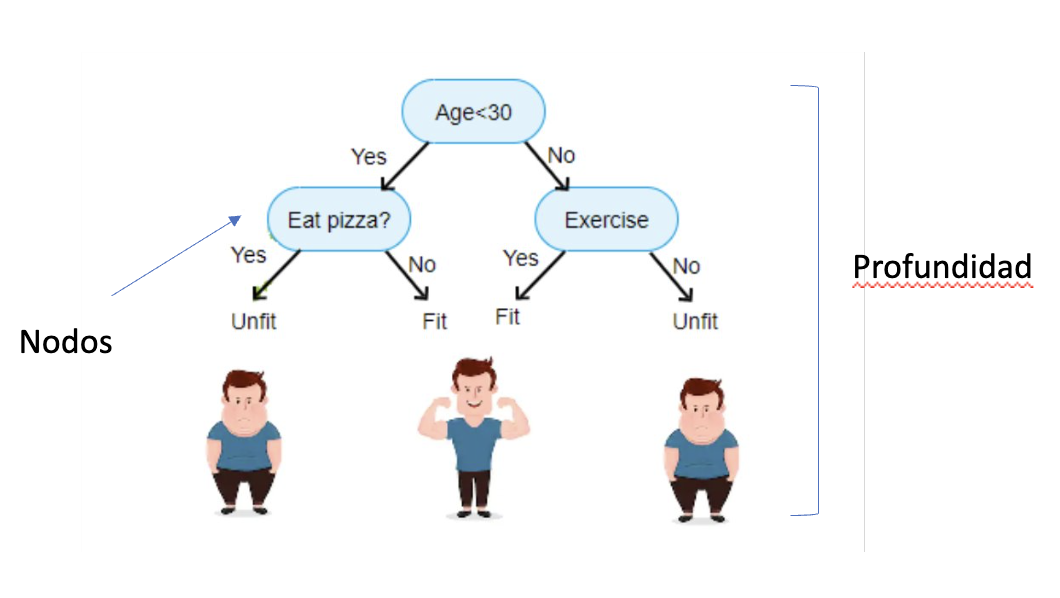

In [174]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(max_depth=5)

In [175]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

### Regresion Logistica

La regresión logística es un modelo estadístico y de aprendizaje automático utilizado para predecir la probabilidad de que un evento binario ocurra. 

La regresión logística modela la relación entre una o más variables independientes (predictoras) y una variable dependiente (objetivo) binaria utilizando una función logística o sigmoide para asegurar que las probabilidades predichas estén en el rango de 0 a 1.

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
clf_lg = LogisticRegression(penalty='l1', solver= 'liblinear')

clf_lg.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

## Evaluación en modelos de clasificación

**Confusion Matrix**

| Real /Predicted | Negative | Positive |
| --- | --- | --- |
| Negative | True Negative | False Positive |
| Positive | False Negative | True Positive |

- Verdadero Positivo - TP (acierto): la clase real es Positivo y el modelo predice Positivo.

- Verderado Negativo - TN (acierto): la clase real es Negativo y el modelo predice Negativo.

- Falso Positivo - FP(error): la clase real es Negativo y el modelo predice Positivo.

- Falso Negativo – FN (error): la clase real es Positivo y el modelo predice Negativo.


**Accuracy**
Mide que tan bueno es en general el modelo para identificar las clases. No es una buena medida cuando las clases estan desbalanceadas. 

\begin{align}
\ Accuracy = \ \frac{True Positive + True Negative}{(True Positive + True Negative + False Negative + False Positive)} \\
\end{align}

**Precision**
Que tan preciso o exacto es su modelo en la predicción de los positivos predichos, cuantos de ellos son positivos reales. La precisión es una buena medida para determinar cuando los costos de falsos positivos son altos, es decir aquellas observaciones que siendo negativas, el modelo las predice como de la clase positiva.
Este es el llamado Error tipo 1, predijiste positivo y esto es falso. 

\begin{align}
\ Precision = \ \frac{True Positive}{(True Positive + False Positive)} \\
\end{align}

**Recall**
Calcula cuántos de los positivos reales captura nuestro modelo etiquetándolo como positivos. Esta métrica es buena cuando existe un alto costo asociado con el Falso Negativo, es decir aquellas observaciones que siendo positivas, el modelo las predice como de la clase negativa. 
Este es el llamado Error tipo 2, predijiste negativo y esto es falso. 

\begin{align}
\ Recall = \ \frac{True Positive}{(True Positive + False Negative)} \\
\end{align}

**F1-Score**
Esta métrica es necesaria cuando desea buscar un equilibrio entre precisión y recall, y si hay una distribución de clase desigual (gran cantidad de Negativos reales).

\begin{align}
\ F1 = 2 * \ \frac{Precision * Recall}{(Precision + Recall)} \\
\end{align}

**AUC-ROC-Curve**
ROC es una curva de probabilidad y AUC representa el grado o medida de separabilidad. Indica cuánto es capaz el modelo de distinguir entre clases. Cuanto mayor sea el AUC, mejor será el modelo para predecir las clases.

True Positive Rate / Recall /Sensitivity

\begin{align}
\ \frac{True Positive}{(True Positive + False Negative)} \\
\end{align}

True Negative Rate, Specifity: 

\begin{align}
\ \frac{True Negative}{(True Negative + False Positive)} \\
\end{align}

El indicador más utilizado en muchos contextos es el área bajo la curva ROC o AUC. Este índice se puede interpretar como la probabilidad de que un clasificador ordenará o puntuará una instancia positiva elegida aleatoriamente más alta que una negativa.


### Modelo de arbol de decision

In [183]:
# Predict
y_train_pred = clf.predict(x_train)

In [184]:
x_test = scaler.transform(x_test)

In [185]:
y_test_pred = clf.predict(x_test)

In [186]:
from sklearn import metrics
from sklearn import metrics

In [187]:
# Evaluate train
text = "Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(metrics.classification_report(y_train, y_train_pred))

Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [188]:
# Evaluate train
text = "Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(metrics.classification_report(y_test, y_test_pred))

Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.90      0.95        10

    accuracy                           0.92        13
   macro avg       0.88      0.95      0.90        13
weighted avg       0.94      0.92      0.93        13



<Figure size 640x480 with 0 Axes>

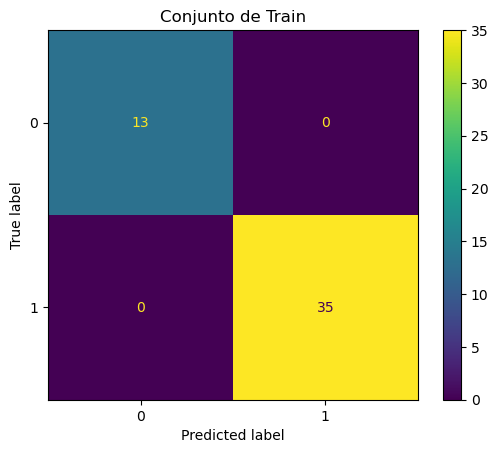

In [189]:
plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.title('Conjunto de Train')
plt.show()

<Figure size 640x480 with 0 Axes>

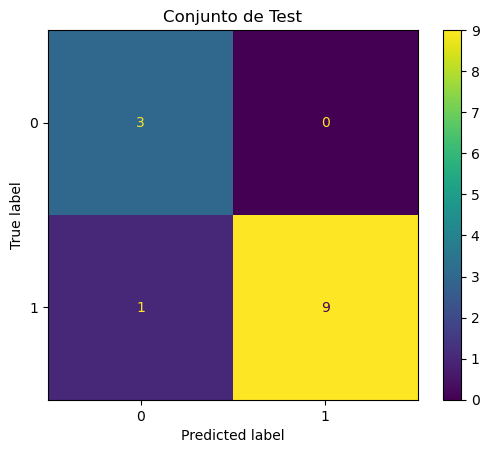

In [190]:
plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
plt.title('Conjunto de Test')
plt.show()

### Modelo de regresion logistica

In [192]:
# Predict
y_train_pred = clf_lg.predict(x_train)

In [193]:
x_test = scaler.transform(x_test)

In [194]:
y_test_pred = clf_lg.predict(x_test)

In [195]:
# Evaluate train
text = "Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(metrics.classification_report(y_train, y_train_pred))

Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [196]:
# Evaluate train
text = "Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(metrics.classification_report(y_test, y_test_pred))

Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.23      1.00      0.38         3
           1       0.00      0.00      0.00        10

    accuracy                           0.23        13
   macro avg       0.12      0.50      0.19        13
weighted avg       0.05      0.23      0.09        13



<Figure size 640x480 with 0 Axes>

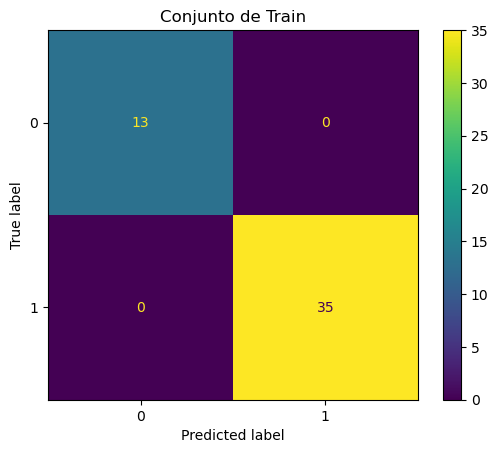

In [197]:
plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.title('Conjunto de Train')
plt.show()

<Figure size 640x480 with 0 Axes>

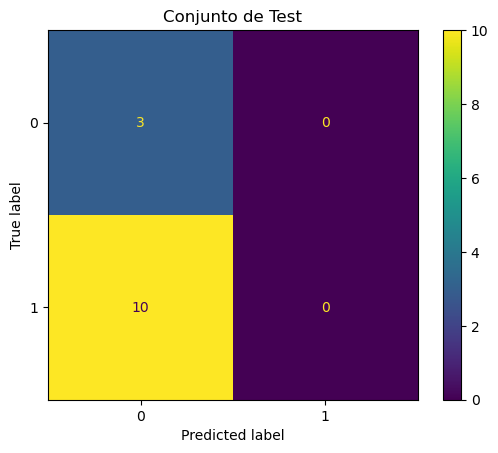

In [198]:
plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
plt.title('Conjunto de Test')
plt.show()

## Clustering : K-Means Clustering

In [259]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [250]:
scaler = StandardScaler()

In [252]:
data_escalada = scaler.fit_transform(data)

In [254]:
def eleccion_cluster(X_train):
    inertia = []
    silhouet = []
    
    for n in range(2, 15):
        km = KMeans(n_clusters=n, random_state=42).fit(X_train) 
        inertia.append(km.inertia_)
        silhouet.append(silhouette_score(X_train, km.labels_))
    
    fig, axes = plt.subplots(2,1,figsize=(8,8))

    axes[0].plot(np.arange(2, 15), inertia)
    axes[0].set_ylabel("Inertia")
    axes[0].set_title("Inertia of k-Means")
    
    axes[1].plot(np.arange(2, 15), silhouet)
    axes[1].set_ylabel("Silhouet")
    axes[1].set_title("Silhouet score")   

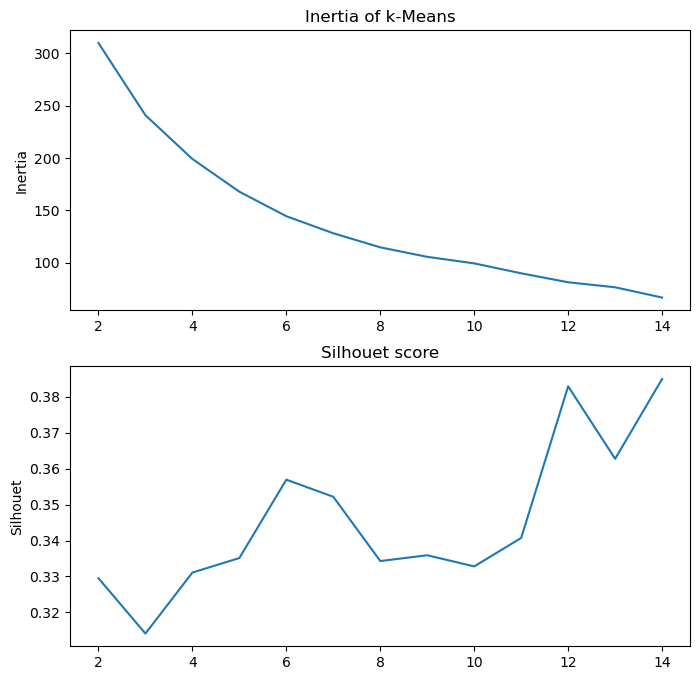

In [261]:
eleccion_cluster(data_escalada)

Se observa una clara caida en la inercia para el numero de cluster 4, y una silueta relativamente alta. Observemos como es la silueta de cada cluster a continuacion

Para n_clusters = 2 El silhouette_score promedio es : 0.32949891706911333
Para n_clusters = 4 El silhouette_score promedio es : 0.34080165430747766
Para n_clusters = 6 El silhouette_score promedio es : 0.35562962446192475
Para n_clusters = 8 El silhouette_score promedio es : 0.34230261092736286


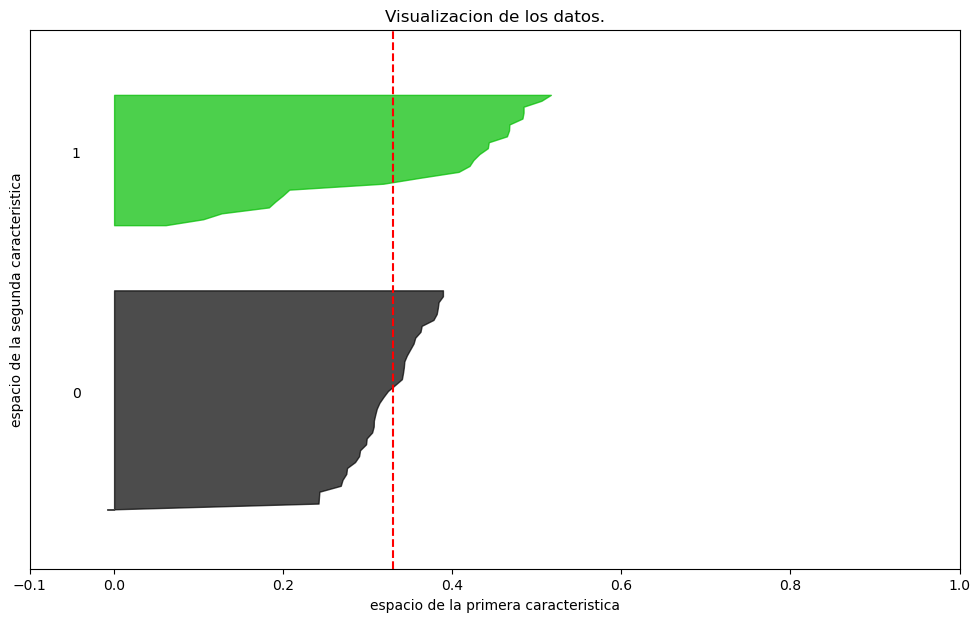

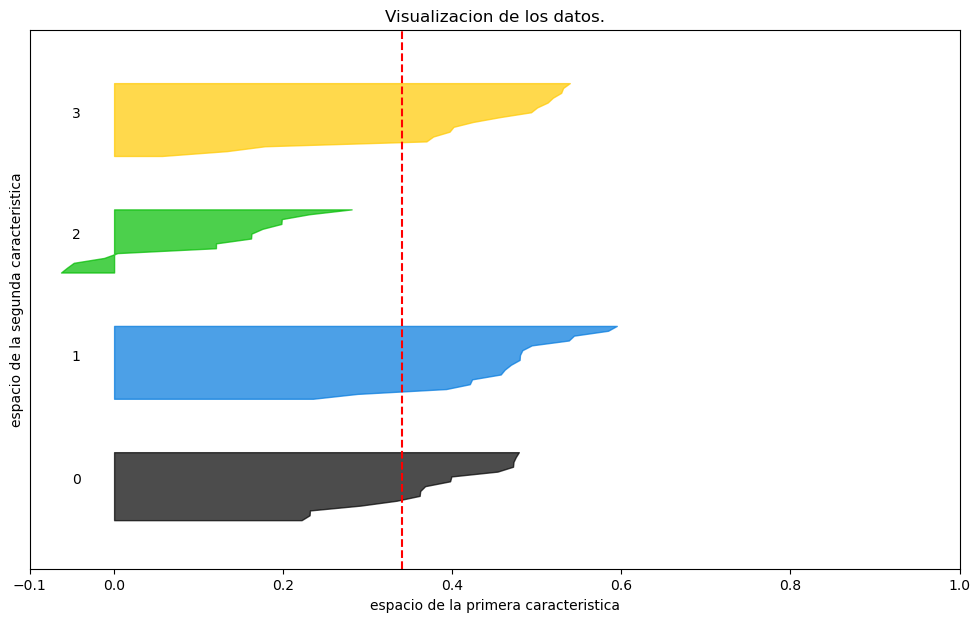

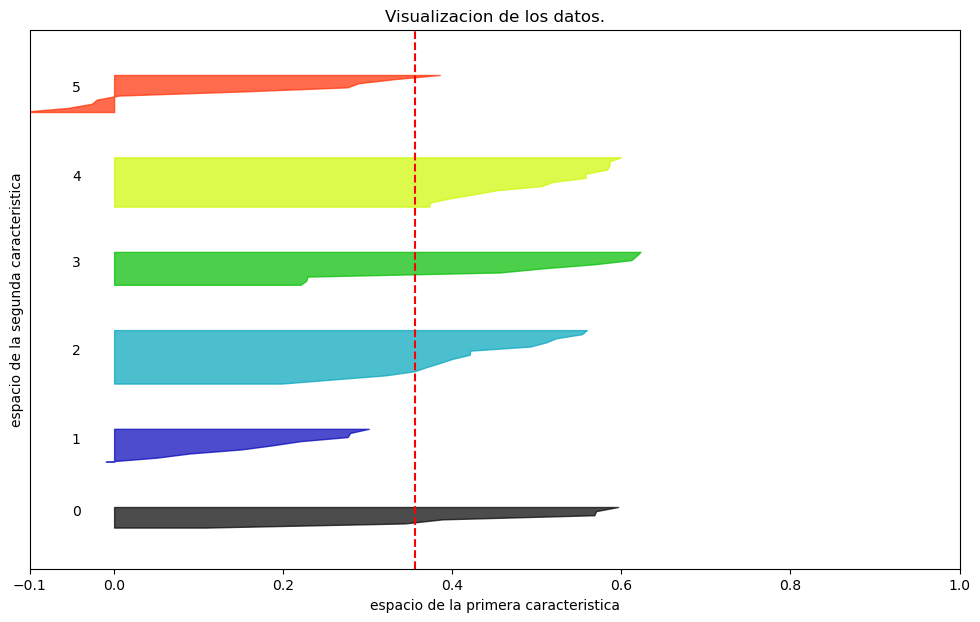

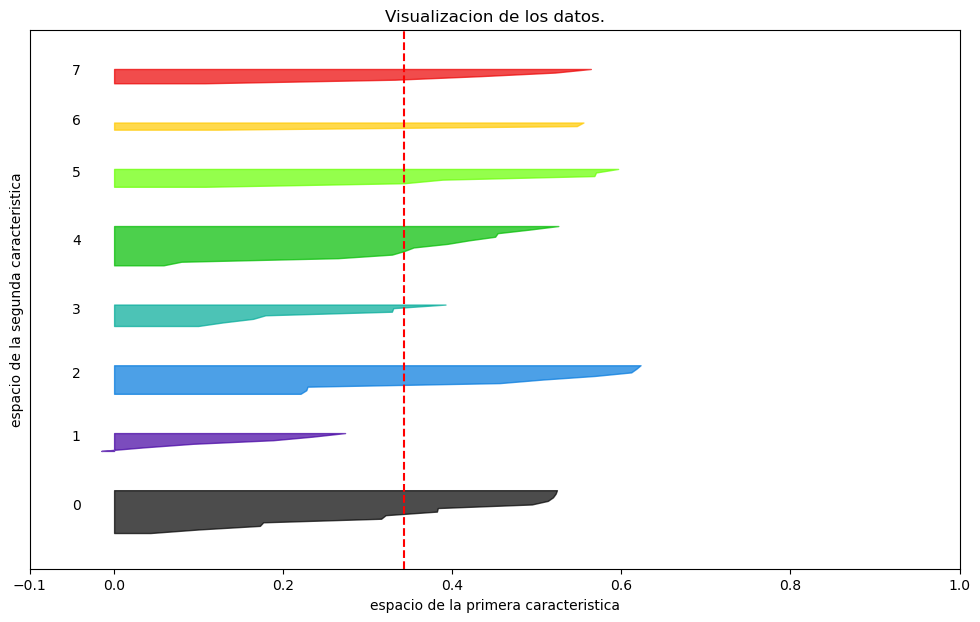

In [270]:
X = data_escalada

range_n_clusters = [2,4,6,8]
sse ={}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(12, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init = 100 )
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

### Guardado de etiquetas

In [273]:
# Número de clusters buscado
n_clust = 2

km = KMeans(n_clusters=n_clust, random_state=10, n_init = 100 )
km.fit(data_escalada) 
clusters_labels = km.labels_
clusters_labels

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

In [275]:
len(clusters_labels)

61

In [293]:
df = pd.read_csv("loan.csv")

In [295]:
# Armamos columna en df_clusters
df['cluster_kmeans'] = clusters_labels

Observamos cada grupo clusterizado y buscamos encontrar patrones.

In [297]:
df.cluster_kmeans.value_counts()

cluster_kmeans
0    38
1    23
Name: count, dtype: int64

In [299]:
df.groupby('cluster_kmeans').describe().T.head(20)

cluster_kmeans                  0             1
age          count      38.000000     23.000000
             mean       42.184211     28.652174
             std         6.349528      2.551447
             min        32.000000     24.000000
             25%        37.250000     27.000000
             50%        41.500000     29.000000
             75%        46.750000     30.500000
             max        55.000000     33.000000
income       count      38.000000     23.000000
             mean    98289.473684  47086.956522
             std     26800.471854  13970.465742
             min     60000.000000  25000.000000
             25%     82750.000000  36500.000000
             50%     93500.000000  45000.000000
             75%    110000.000000  55000.000000
             max    180000.000000  75000.000000
credit_score count      38.000000     23.000000
             mean      756.842105    632.173913
             std        37.926334     43.165277
             min       680.000000    560.000000

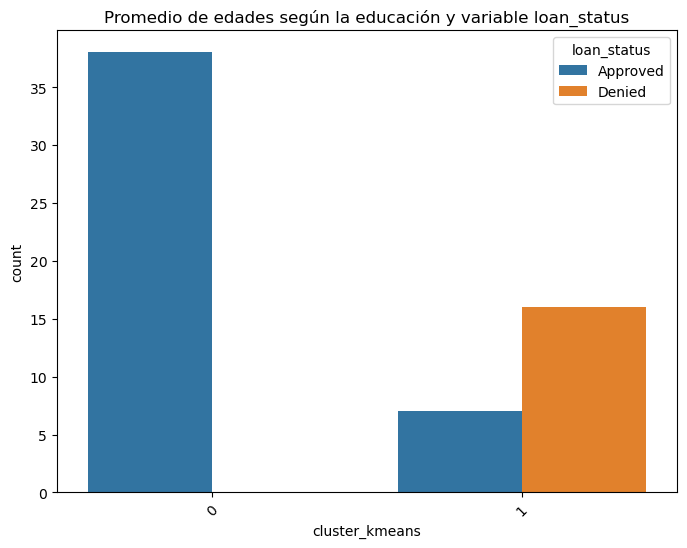

In [305]:
import seaborn as sns 

fig = plt.figure(figsize=(8,6))
sns.countplot(data=df, x='cluster_kmeans',
                hue='loan_status')
plt.xticks(rotation=45)
plt.title("Clusters segun loan status")
plt.ticklabel_format(style='plain', axis='y')

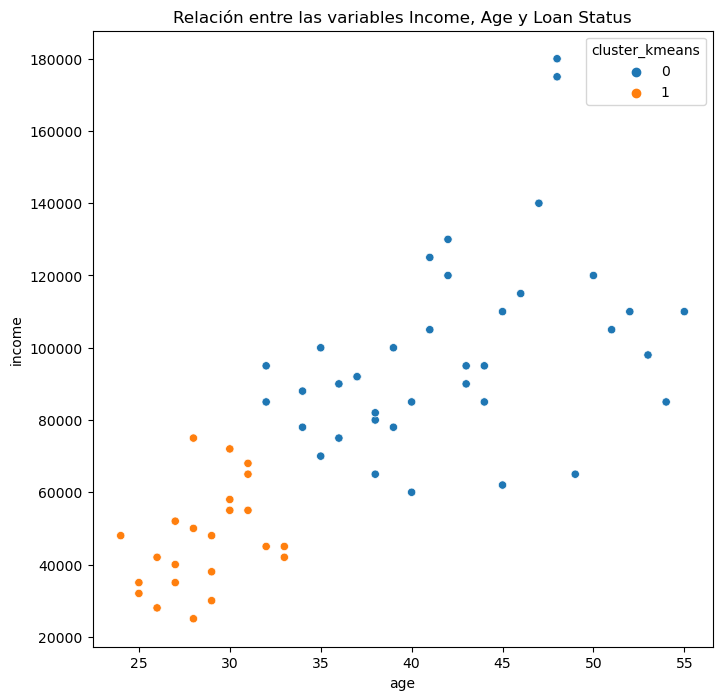

In [310]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='age', y='income', hue='cluster_kmeans', legend="auto")  
plt.title(f'Relación entre las variables Income, Age y Loan Status')
plt.show()